In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import warnings 
warnings.filterwarnings('ignore')


In [4]:
telemetry = pd.read_csv('C://Users/DeryabinNS/PdM_telemetry.csv', parse_dates = ['datetime'])
models = pd.read_csv('C://Users/DeryabinNS/PdM_machines.csv')
failures = pd.read_excel('C://Users/DeryabinNS/PdM_failures.xlsx', parse_dates = ['datetime'])
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [3]:
res.dtypes

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
model                object
age                   int64
dtype: object

In [10]:
failure_onehot = pd.get_dummies(failures, columns = ['failure'])
sum_of_components_fail = failure_onehot.groupby(by=['datetime', 'machineID'], as_index=False).sum()
sum_of_components_fail.head()

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4
0,2015-01-02 03:00:00,16,1,0,1,0
1,2015-01-02 03:00:00,17,0,0,0,1
2,2015-01-02 03:00:00,22,1,0,0,0
3,2015-01-02 03:00:00,35,1,0,0,0
4,2015-01-02 03:00:00,45,1,0,0,0


In [11]:
sum_of_components_fail.describe().T

,count,mean,std,min,25%,50%,75%,max
machineID,719.0,52.349096,29.362194,1.0,24.0,52.0,79.0,100.0
failure_comp1,719.0,0.267038,0.442720,0.0,0.0,0.0,1.0,1.0
failure_comp2,719.0,0.360223,0.480399,0.0,0.0,0.0,1.0,1.0
failure_comp3,719.0,0.182197,0.386276,0.0,0.0,0.0,0.0,1.0
failure_comp4,719.0,0.248957,0.432710,0.0,0.0,0.0,0.0,1.0


In [13]:
with_failure = sum_of_components_fail.merge(res, how='right', on=['machineID', 'datetime'])
with_failure.fillna(0, inplace=True)
with_failure.head()

,datetime,machineID,failure_comp1,failure_comp2,failure_comp3,failure_comp4,volt,rotate,pressure,vibration,model,age
0,2015-01-02 03:00:00,16,1.0,0.0,1.0,0.0,170.524081,405.302970,109.855730,37.786365,model1,3
1,2015-01-02 03:00:00,17,0.0,0.0,0.0,1.0,158.098828,406.325391,97.001765,59.967174,model1,14
2,2015-01-02 03:00:00,22,1.0,0.0,0.0,0.0,204.623416,426.794399,119.485200,44.055151,model1,14
3,2015-01-02 03:00:00,35,1.0,0.0,0.0,0.0,174.495255,508.561648,90.875311,37.334185,model1,17
4,2015-01-02 03:00:00,45,1.0,0.0,0.0,0.0,200.855874,401.801361,100.217930,57.997168,model3,14


In [14]:
with_failure.describe().T

,count,mean,std,min,25%,50%,75%,max
machineID,876100.0,50.500000,28.866087,1.000000,25.750000,50.500000,75.250000,100.000000
failure_comp1,876100.0,0.000219,0.014802,0.000000,0.000000,0.000000,0.000000,1.000000
failure_comp2,876100.0,0.000296,0.017191,0.000000,0.000000,0.000000,0.000000,1.000000
failure_comp3,876100.0,0.000150,0.012227,0.000000,0.000000,0.000000,0.000000,1.000000
failure_comp4,876100.0,0.000204,0.014292,0.000000,0.000000,0.000000,0.000000,1.000000
volt,876100.0,170.777736,15.509114,97.333604,160.304927,170.607338,181.004493,255.124717
rotate,876100.0,446.605119,52.673886,138.432075,412.305714,447.558150,482.176600,695.020984
pressure,876100.0,100.858668,11.048679,51.237106,93.498181,100.425559,107.555231,185.951998
vibration,876100.0,40.385007,5.370361,14.877054,36.777299,40.237247,43.784938,76.791072
age,876100.0,11.330000,5.827619,0.000000,6.750000,12.000000,16.000000,20.000000


In [16]:
averages = with_failure.groupby(by=['machineID', 'model'], as_index=False).agg({"rotate" : "mean",
                                                                              "volt" : "mean",
                                                                              "pressure" : "mean",
                                                                              "vibration" : "mean",
                                                                              'failure_comp1' : 'sum',
                                                                              'failure_comp2' : 'sum',
                                                                              'failure_comp3' : 'sum',
                                                                              'failure_comp4' : 'sum'})

In [17]:
averages.describe().T

,count,mean,std,min,25%,50%,75%,max
machineID,100.0,50.500000,29.011492,1.000000,25.750000,50.500000,75.250000,100.000000
rotate,100.0,446.605119,0.814236,444.766488,446.073076,446.582038,447.042344,448.564574
volt,100.0,170.777736,0.189982,170.339950,170.653861,170.780240,170.902251,171.267153
pressure,100.0,100.858668,0.308647,100.416061,100.631206,100.745276,101.085001,101.705498
vibration,100.0,40.385007,0.124112,40.142659,40.276075,40.358822,40.482825,40.694790
failure_comp1,100.0,1.920000,1.211727,0.000000,1.000000,2.000000,3.000000,4.000000
failure_comp2,100.0,2.590000,1.407735,0.000000,2.000000,3.000000,3.000000,6.000000
failure_comp3,100.0,1.310000,1.952440,0.000000,0.000000,0.000000,3.000000,6.000000
failure_comp4,100.0,1.790000,1.965845,0.000000,0.000000,0.000000,4.000000,6.000000


In [18]:
def show_regplot(data, x, y):
    """Ouput graph of regression between the parameters of
    telemetry and failure components
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    sns.regplot(x = x, y = y, data = data)
    
    lr = LinearRegression().fit(data[x].reshape(-1, 1), data[y].reshape(-1, 1))
    y_prediction = lr.predict(data[y].reshape(-1, 1))
    
    mse = mean_squared_error(data[y], y_prediction)
    mae = mean_absolute_error(data[y], y_prediction)
    R, p = scipy.stats.spearmanr(data[x], data[y])
    print('R = {0}, p = {1}, n = {2}'.format(round(R, 5), round(p, 5), data[x].shape[0]))
    print("[{3}] = {0} {2} {1} • [{4}]".format(lr.intercept_, lr.coef_[0], "-" if lr.coef_[0]<0 else "+", y, x))
    print("MSE = {0}, MAE = {1}".format(round(mse, 5), round(mae, 5)))
    
    plt.show()

AttributeError: 'Series' object has no attribute 'reshape'

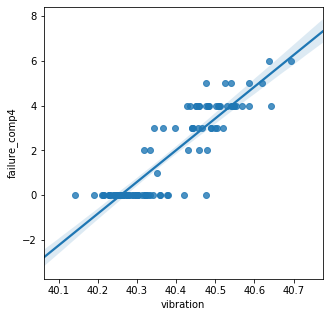

In [22]:
show_regplot(averages, 'vibration', 'failure_comp4')